In [1]:
from core.req_arrays import *
# from core import readfiles
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from astropy.coordinates import SkyCoord as scr
from astropy import units as u

read icdata
read uptdata
read eadata
read mspdata


In [12]:
min(psdist)

-99999.0

In [16]:
# psra = msra
# psdec = msdec
psra = []
psdec = []
psdist = []
for i in range(len(msra)):
    if msdist[i] != -99999.0:
        psra.append(msra[i])
        psdec.append(msdec[i])
        psdist.append(msdist[i])
    
psra2 = np.deg2rad([(i + 180)%360 - 180 for i in psra])
nura = np.deg2rad([(i + 180)%360 - 180 for i in icra])
nudec = np.deg2rad(icdec)
#[psra[0], psra2[0]]
# psra = np.deg2rad(psra)
# psdec = np.deg2rad(psdec)
p3 =[]
for i in psra2:
    if i < 0 and i > np.deg2rad(-110):
        p3.append(i)

radec = scr(ra = psra * u.degree, dec = psdec * u.degree, frame = 'icrs')           #CONVERSION
nudec = scr(ra = icra * u.degree, dec = icdec * u.degree, frame = 'icrs')           #CONVERSION
radec = radec.galactic      #CONVERSION FROM RA,DEC TO GALACTIC COORDINATES
nudec = nudec.galactic      #CONVERSION FROM RA,DEC TO GALACTIC COORDINATES

gl = [(i + np.pi)%(2*np.pi) - np.pi for i in radec.l.radian]
gb = radec.b.radian

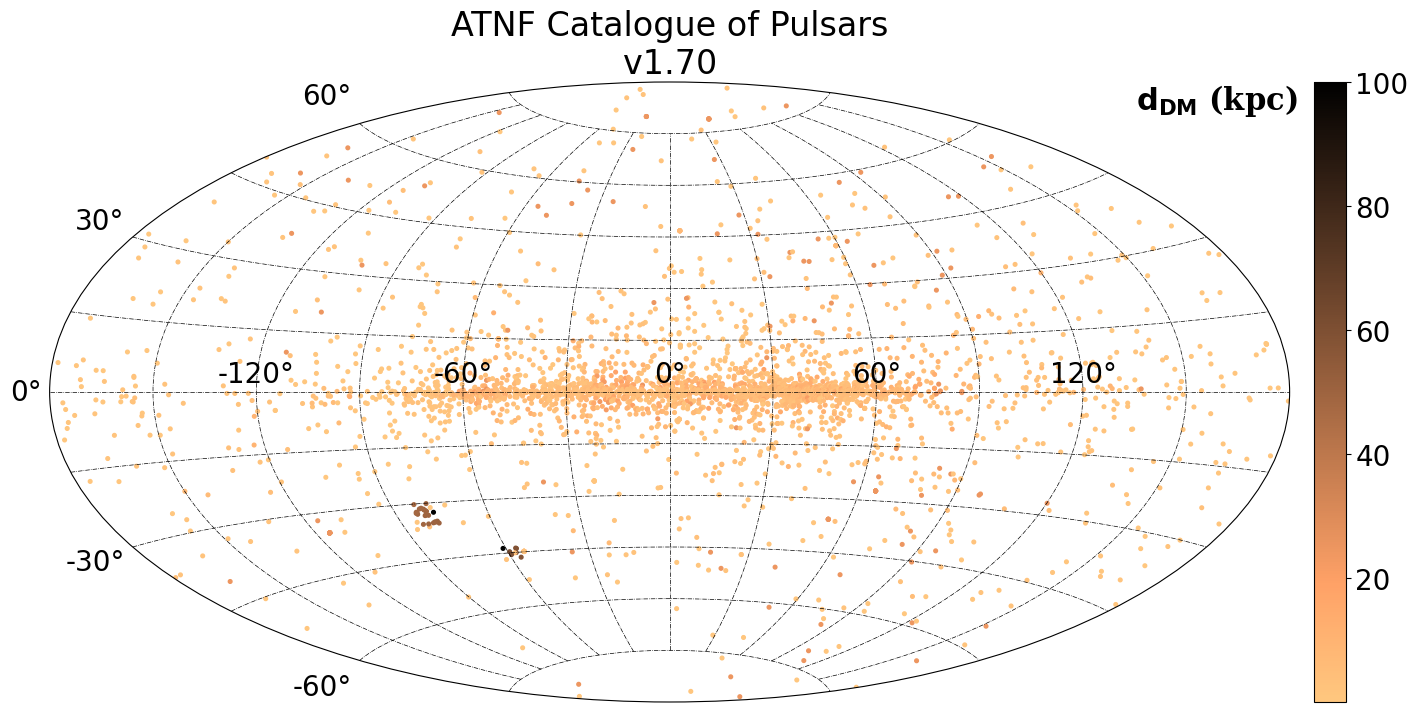

In [17]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 22,
        }
comap = 'copper_r'
fig = plt.figure(figsize=(16, 10))
plt.rcParams.update({'font.size': 20})
ax2 = plt.subplot(projection='aitoff')
plott = ax2.scatter(gl, gb,marker='o', c=psdist, cmap=comap, s = 7, label='Pulsars')
#plt.title("GALACTIC COORDINATES", fontdict=font)
#ax2.scatter(msra, msdec,marker='o',color='b', s = 1.2)
#ax2.scatter(icra, icdec, marker='.',color='green', alpha=0.05, s = 0.1)
ax2.xaxis.set_major_locator(plt.FixedLocator(np.pi / 3 * np.linspace(-2,2, 5)))
ax2.xaxis.set_minor_locator(plt.FixedLocator(np.pi / 6 * np.linspace(-5, 5, 11)))
ax2.yaxis.set_major_locator(plt.FixedLocator(np.pi / 6 * np.linspace(-2, 2, 5)))
ax2.yaxis.set_minor_locator(plt.FixedLocator(np.pi / 12 * np.linspace(-5, 5, 11)))
ax2.title.set_text("ATNF Catalogue of Pulsars\nv1.70") 
ax2.grid(True, which='both', color='black', lw=0.5, ls='-.')
#ax2.axvspan(min(p3), max(p3), color='pink', alpha=0.5)
#ax2.set_title('PULSARS WITH TSmax ~0\nHAMMER projection \n', fontdict=font)

cax = fig.add_axes([ax2.get_position().x1+0.015,ax2.get_position().y0,0.02,ax2.get_position().height])
cbar = fig.colorbar(plott, cax=cax)
cbar.set_label('$\mathbf{d_{DM}}$ (kpc)\n\n', loc='top', rotation=0,labelpad=-80, fontdict=font)
#plt.suptitle(filenamewithpath.replace('icecube_10year_ps/events/','').replace('_exp','') + ' GALACTIC')

plt.savefig(os.getcwd() + '/outputs/psr-dis-map.jpg')
plt.show()

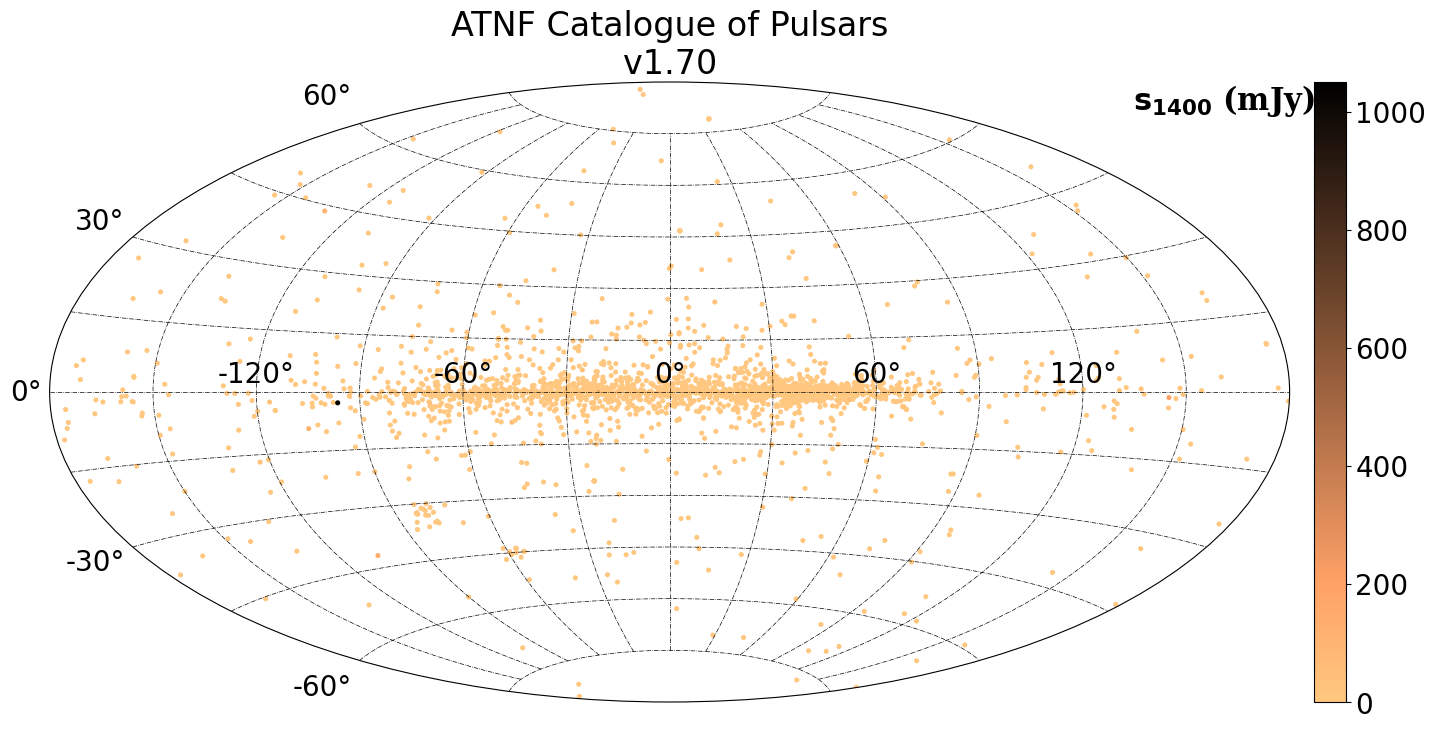

In [23]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 22,
        }
comap = 'copper_r'
fig = plt.figure(figsize=(16, 10))
plt.rcParams.update({'font.size': 20})
ax2 = plt.subplot(projection='aitoff')
plott = ax2.scatter(gl, gb,marker='o', c=mss1400, cmap=comap, s = 7, label='Pulsars')
#plt.title("GALACTIC COORDINATES", fontdict=font)
#ax2.scatter(msra, msdec,marker='o',color='b', s = 1.2)
#ax2.scatter(icra, icdec, marker='.',color='green', alpha=0.05, s = 0.1)
ax2.xaxis.set_major_locator(plt.FixedLocator(np.pi / 3 * np.linspace(-2,2, 5)))
ax2.xaxis.set_minor_locator(plt.FixedLocator(np.pi / 6 * np.linspace(-5, 5, 11)))
ax2.yaxis.set_major_locator(plt.FixedLocator(np.pi / 6 * np.linspace(-2, 2, 5)))
ax2.yaxis.set_minor_locator(plt.FixedLocator(np.pi / 12 * np.linspace(-5, 5, 11)))
ax2.title.set_text("ATNF Catalogue of Pulsars\nv1.70") 
ax2.grid(True, which='both', color='black', lw=0.5, ls='-.')
#ax2.axvspan(min(p3), max(p3), color='pink', alpha=0.5)
#ax2.set_title('PULSARS WITH TSmax ~0\nHAMMER projection \n', fontdict=font)

cax = fig.add_axes([ax2.get_position().x1+0.015,ax2.get_position().y0,0.02,ax2.get_position().height])
cbar = fig.colorbar(plott, cax=cax)
cbar.set_label('$\mathbf{s_{1400}}}$ (mJy)\n\n', loc='top', rotation=0,labelpad=-80, fontdict=font)
#plt.suptitle(filenamewithpath.replace('icecube_10year_ps/events/','').replace('_exp','') + ' GALACTIC')

plt.savefig(os.getcwd() + '/outputs/psr-dis-map.jpg')
plt.show()

#Plotting atnf pulsars
comap = 'copper_r'
fig = plt.figure(figsize=(16, 10))
plt.rcParams.update({'font.size': 20})
ax2 = plt.subplot(projection='aitoff')
plott = ax2.scatter(gl, gb,marker='*', c='brown',s = 2, label='Pulsars')
#plt.title("GALACTIC COORDINATES", fontdict=font)
#ax2.scatter(msra, msdec,marker='o',color='b', s = 1.2)
#ax2.scatter(icra, icdec, marker='.',color='green', alpha=0.05, s = 0.1)
ax2.xaxis.set_major_locator(plt.FixedLocator(np.pi / 3 * np.linspace(-2,2, 5)))
ax2.xaxis.set_minor_locator(plt.FixedLocator(np.pi / 6 * np.linspace(-5, 5, 11)))
ax2.yaxis.set_major_locator(plt.FixedLocator(np.pi / 6 * np.linspace(-2, 2, 5)))
ax2.yaxis.set_minor_locator(plt.FixedLocator(np.pi / 12 * np.linspace(-5, 5, 11)))
ax2.grid(True, which='both', color='black', lw=0.5, ls='-.')
ax2.title.set_text("ATNF Catalogue of Pulsars\nv1.70") 
#ax2.title("ATNF catalog of Pulsars")

plt.savefig('/media/darkwake/VIB2/Project-IceCube/Project-Report/Images/pulsar-map.jpg')
plt.show()

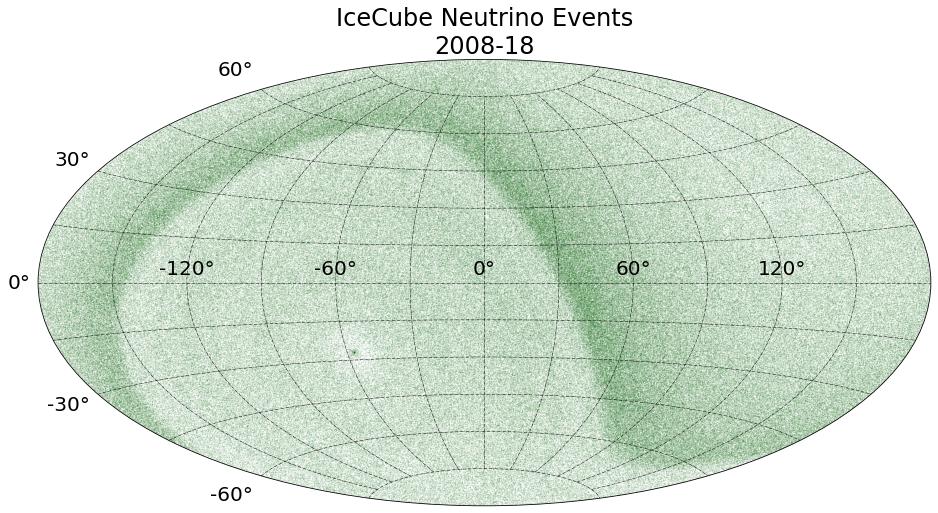